In [3]:
# Install LightGBM inside Jupyter Notebook
!pip install lightgbm
!pip install xgboost


In [4]:
# pip install lightgbm
import lightgbm as lgb
import pandas as pd
import numpy as np
import xgboost
import openpyxl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#importing pandas in Python with the pd alias
import pandas as pd
# File path to the Excel file
file_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/BI_PROJECT.xlsx"
df = pd.read_excel(file_path)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

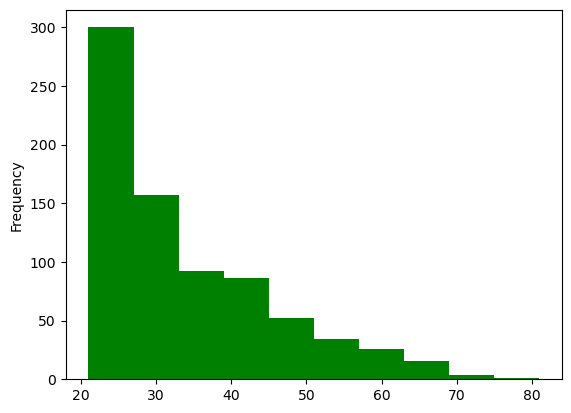

In [17]:
df.Age.plot(color="green",kind="hist")

# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual1_AgeHistogram.png"
plt.savefig(save_path)

# Optional: Show the plot
plt.show()


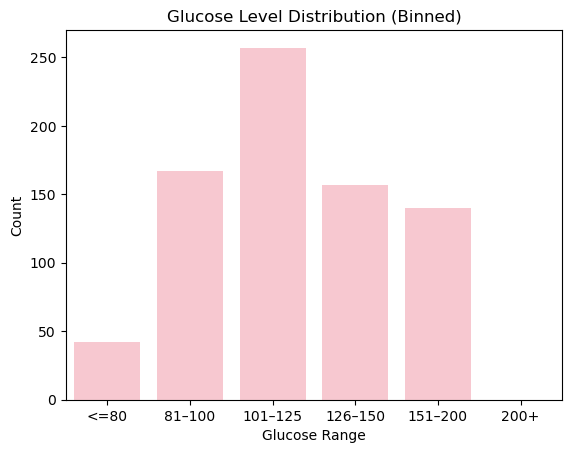

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create glucose bins (ranges)
df["Glucose_Bins"] = pd.cut(df["Glucose"], bins=[0, 80, 100, 125, 150, 200, 300],
                            labels=["<=80", "81–100", "101–125", "126–150", "151–200", "200+"])

# Plot the countplot with binned glucose levels
sns.countplot(x="Glucose_Bins", data=df, color="pink")
plt.title("Glucose Level Distribution (Binned)")
plt.xlabel("Glucose Range")
plt.ylabel("Count")
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual2_Glucose Level Distribution (Binned).png"
plt.savefig(save_path)
plt.show()


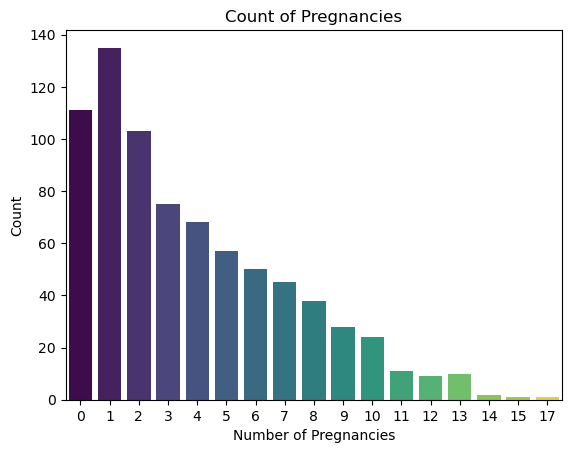

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Pregnancies count using hue with same x variable and disable legend
sns.countplot(x="Pregnancies", data=df, hue="Pregnancies", palette="viridis", legend=False)

plt.title("Count of Pregnancies")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Count")
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual3_Count of Pregnancies.png"
plt.savefig(save_path)
plt.show()


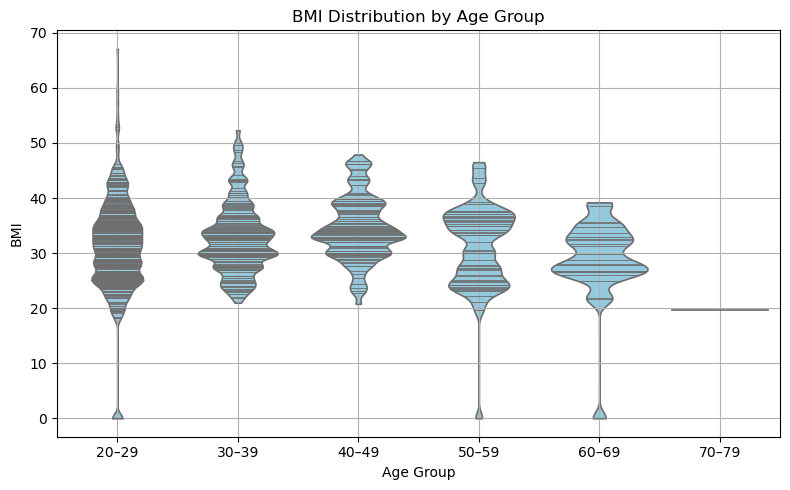

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create AgeGroup bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], 
                        labels=['20–29', '30–39', '40–49', '50–59', '60–69', '70–79'])

# Plot Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='AgeGroup', y='BMI', color="skyblue", cut=0, bw_adjust=0.3, inner="stick")
plt.title("BMI Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual4_BMI Distribution by Age Group.png"
plt.savefig(save_path)
plt.show()


In [25]:
df.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

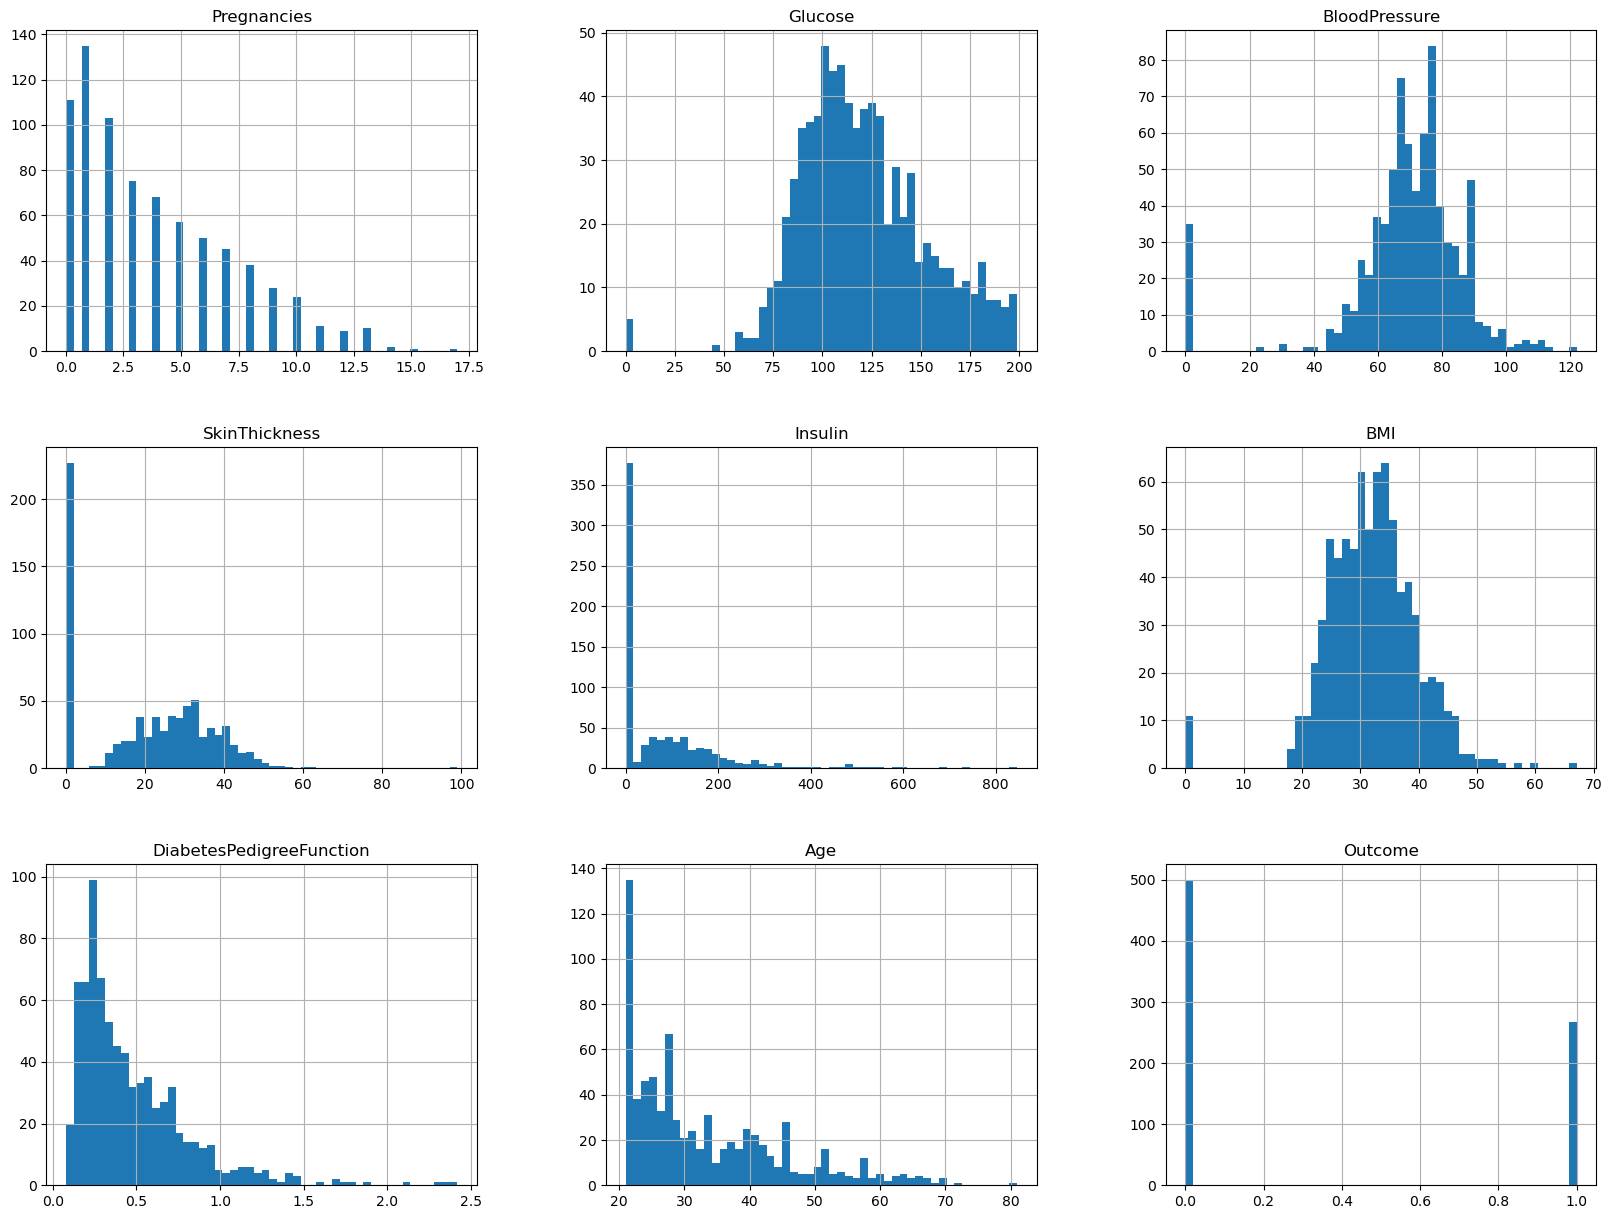

In [27]:
df.hist(bins=50, figsize=(20,15))
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual7_.png"
plt.savefig(save_path)
plt.show()


In [29]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_Bins',
       'AgeGroup'],
      dtype='object')


In [31]:
print(df.dtypes)


Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Glucose_Bins                category
AgeGroup                    category
dtype: object


In [33]:
print(df.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_Bins',
       'AgeGroup'],
      dtype='object')


In [35]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
print(corr_matrix['Outcome'].sort_values(ascending=False))


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


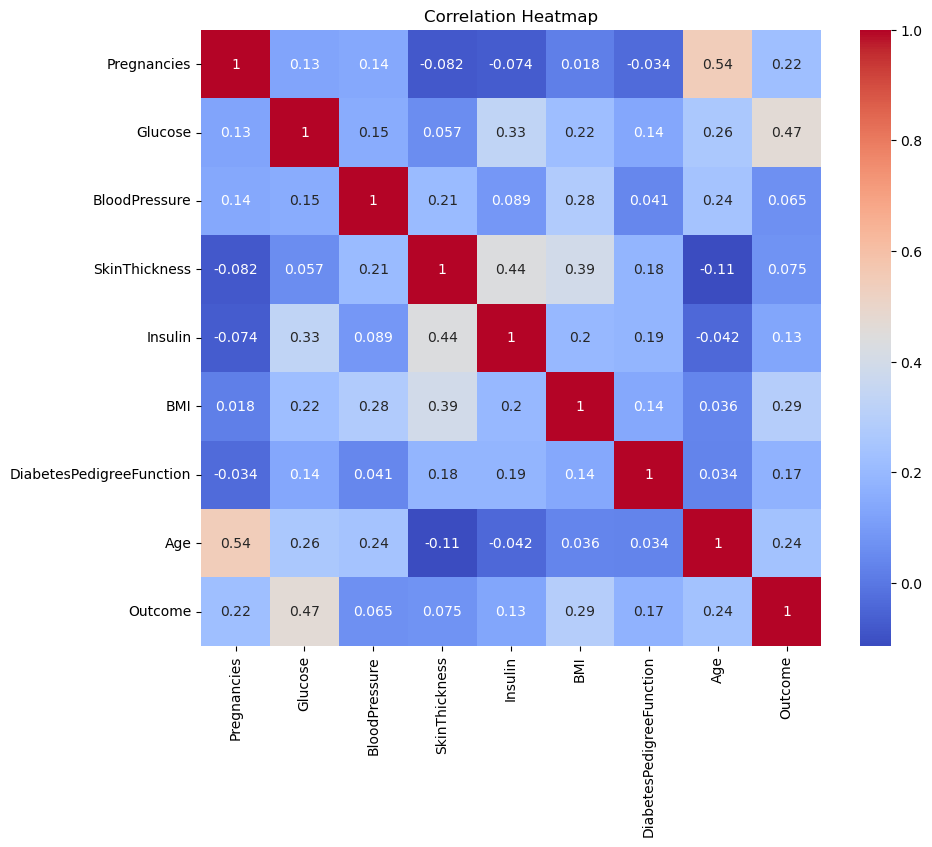

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual8_Correlation Heatmap.png"
plt.savefig(save_path)
plt.show()


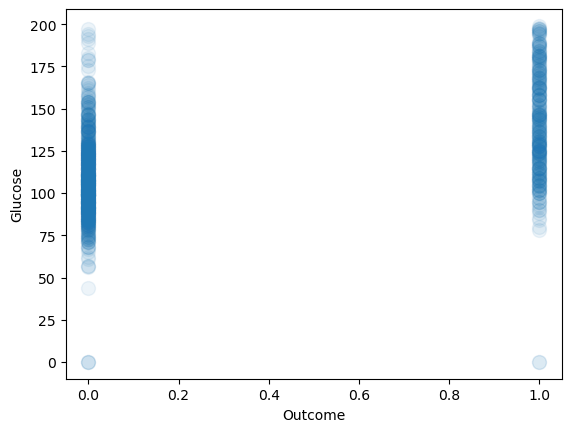

In [39]:
df.plot(kind='scatter', x='Outcome', y='Glucose', s=100, alpha=0.08)
plt.show()


In [41]:
df['Outcome'].value_counts(normalize=True)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [43]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [45]:
# Ensure that all columns except 'Outcome' are numeric
numeric_df = df.drop('Outcome', axis=1).apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any exist after conversion)
numeric_df = numeric_df.dropna()

# Calculate the IQR for each feature
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define outliers based on the IQR (values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR)
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Display the number of outliers in each feature
outlier_count = outliers.sum()
print(f'Number of outliers in each feature:\n{outlier_count}')


Number of outliers in each feature:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Glucose_Bins                0
AgeGroup                    0
dtype: int64


In [47]:
import numpy as np

# Define the Winsorization function
def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.95):
    # Check if the series is numeric
    if series.dtype in ['float64', 'int64']:
        lower = series.quantile(lower_quantile)
        upper = series.quantile(upper_quantile)
        return np.clip(series, lower, upper)
    else:
        # If the column is not numeric, return it as is
        return series

# Apply Winsorization manually for each feature (excluding 'Outcome')
df_winsorized_manual = df.copy()
for col in df.columns:
    if col != 'Outcome':
        df_winsorized_manual[col] = winsorize_series(df[col])

# Check the description of the Winsorized DataFrame
df_winsorized_manual.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.343750,70.439193,20.239583,72.462240,32.158600,0.457207,32.951823,0.348958
std,3.123898,28.989079,12.924804,15.316305,90.568989,6.351629,0.276766,11.006885,0.476951
min,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000


In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# Ensure we work only with numeric columns (exclude 'Outcome')
numeric_columns = df_winsorized_manual.select_dtypes(include=['float64', 'int64']).drop('Outcome', axis=1)

# Recalculate IQR on Winsorized data
Q1_w = numeric_columns.quantile(0.25)
Q3_w = numeric_columns.quantile(0.75)
IQR_w = Q3_w - Q1_w

# Define new outlier boundaries
lower_bound_w = Q1_w - 1.5 * IQR_w
upper_bound_w = Q3_w + 1.5 * IQR_w

# Check how many outliers are still present
outliers_w = (numeric_columns < lower_bound_w) | (numeric_columns > upper_bound_w)

# Count the number of outliers after Winsorization
outlier_count_w = outliers_w.sum()

print("Number of outliers after Winsorization:")
print(outlier_count_w)


Number of outliers after Winsorization:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df_winsorized_manual.select_dtypes(include=['float64', 'int64']).drop('Outcome', axis=1)
y = df_winsorized_manual['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Optional: check class balance after SMOTE
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

# Step 2: Train the model (e.g., Logistic Regression)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Step 3: Predict on original test data
y_pred = model.predict(X_test_scaled)

# Step 4: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Class distribution after SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64
Accuracy: 0.6753246753246753
Confusion Matrix:
 [[66 33]
 [17 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        99
           1       0.54      0.69      0.60        55

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.66       154
weighted avg       0.70      0.68      0.68       154



In [58]:
y_train_resampled.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

In [60]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

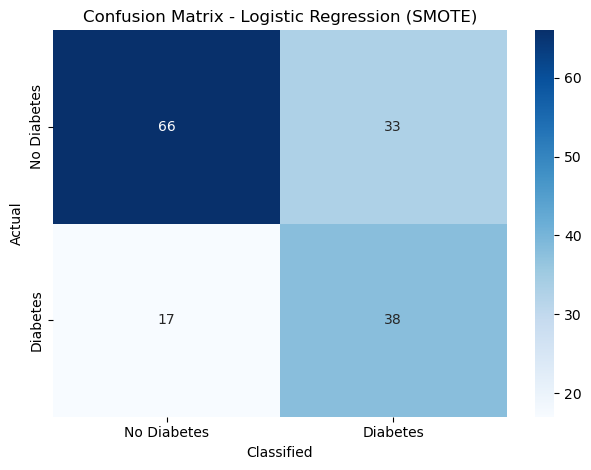

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])

plt.title('Confusion Matrix - Logistic Regression (SMOTE)')
plt.xlabel('Classified')
plt.ylabel('Actual')
plt.tight_layout()
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual9_Confusion Matrix - Logistic Regression (SMOTE).png"
plt.savefig(save_path)
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier()

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.68      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154

[[79 20]
 [13 42]]


Accuracy: 0.7273


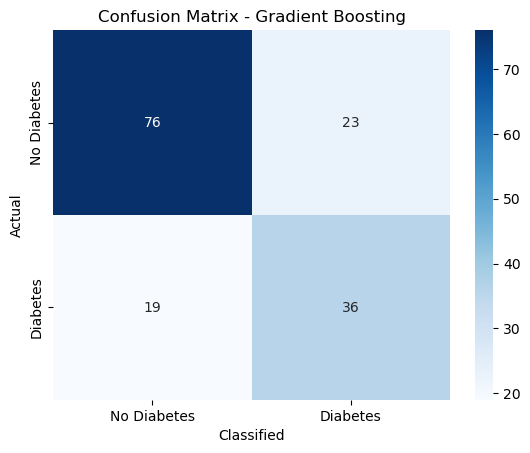

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [100]:
from sklearn.ensemble import GradientBoostingClassifier
# Step 3: Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Step 4: Train the model
gb_model.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = gb_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Classified')
plt.ylabel('Actual')
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual10_Confusion Matrix - Gradient Boosting.png"
plt.savefig(save_path)
plt.show()

# Step 8: Classification Report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))


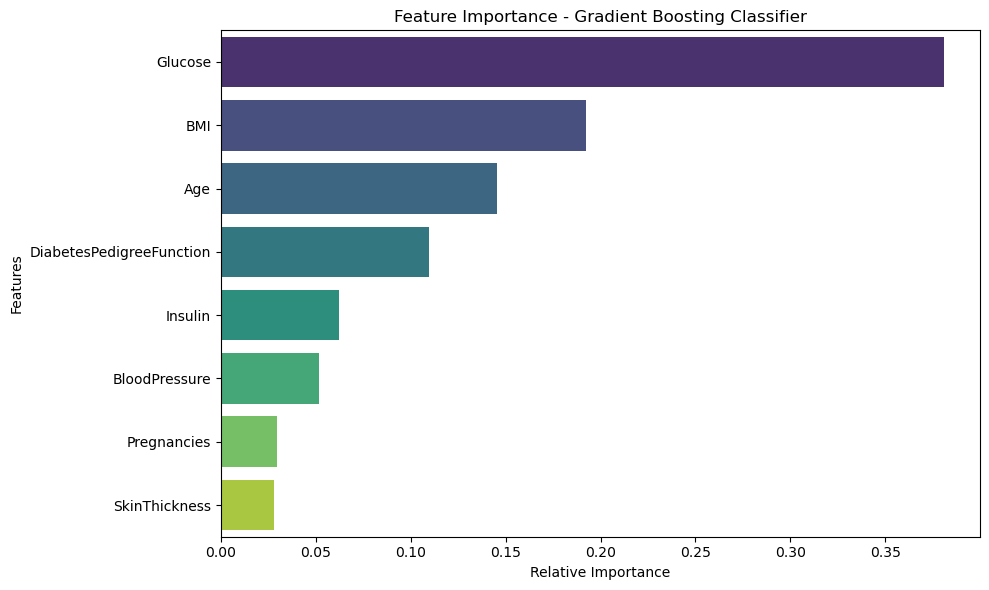

In [70]:
# Step 1: Get feature importances from the trained model
importances = gb_model.feature_importances_

# Step 2: Create a DataFrame for better visualization
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual11_Feature Importance - Gradient Boosting Classifier.png"
plt.savefig(save_path)
plt.show()


In [72]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

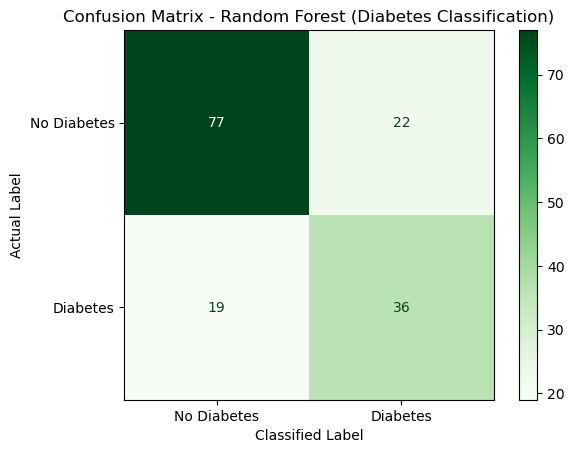

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict outcomes
y_pred = rf_model.predict(X_test)

# Step 2: Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Display the matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Greens')

# Customize title and axis labels
plt.title('Confusion Matrix - Random Forest (Diabetes Classification)')
plt.xlabel('Classified Label')
plt.ylabel('Actual Label')

# Save the plot
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual12_Confusion Matrix - Random Forest (Diabetes Classification).png"
plt.savefig(save_path)
plt.show()


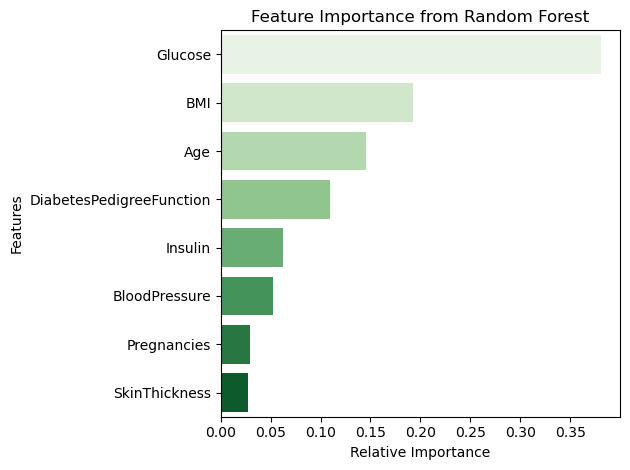

In [76]:
# Add a dummy 'hue' column to match seaborn's new requirement
importance_df['FeatureHue'] = importance_df['Feature']  # temporary for color control

# Plot with hue specified and legend turned off
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    hue='FeatureHue',
    palette='Greens',  # changed from 'viridis' to 'Greens'
    legend=False
)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()

# Save the plot
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual13_FeatureImportance_RF_Green.png"
plt.savefig(save_path)
plt.show()


# 1. What percentage of women with high BMI (BMI > 30) are diagnosed with diabetes?

In [79]:
# Women with high BMI
high_bmi = df[df['BMI'] > 30]

In [81]:
# Calculate percentage diagnosed with diabetes
high_bmi_diabetes_pct = (high_bmi['Outcome'].sum() / len(high_bmi)) * 100

print(f"Percentage of women with high BMI diagnosed with diabetes: {high_bmi_diabetes_pct:.2f}%")

Percentage of women with high BMI diagnosed with diabetes: 46.24%


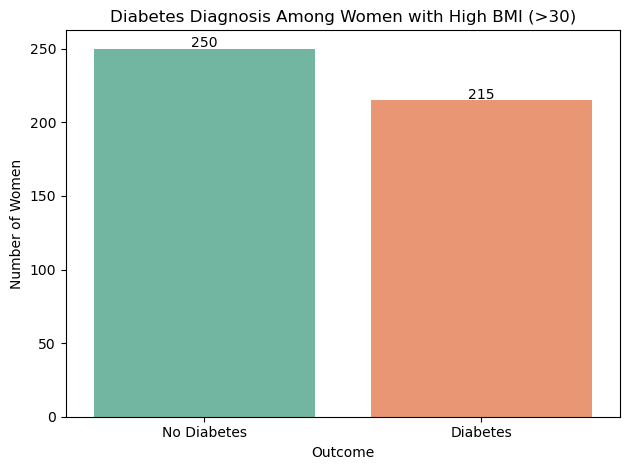

In [83]:
# Count diabetes cases among women with high BMI
bmi_counts = df[df['BMI'] > 30]['Outcome'].value_counts()

# Convert outcome labels
bmi_labels = ['No Diabetes' if i == 0 else 'Diabetes' for i in bmi_counts.index]

# Create DataFrame
bmi_df = pd.DataFrame({
    'Outcome': bmi_labels,
    'Count': bmi_counts.values
})

# Plot
sns.barplot(data=bmi_df, x='Outcome', y='Count', hue='Outcome', palette='Set2', legend=False)
plt.title('Diabetes Diagnosis Among Women with High BMI (>30)')
plt.ylabel('Number of Women')
plt.xlabel('Outcome')

# Add value labels
for i, val in enumerate(bmi_df['Count']):
    plt.text(i, val + 1, str(val), ha='center')

plt.tight_layout()
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual14_Diabetes Diagnosis Among Women with High BMI.png"
plt.savefig(save_path)
plt.show()


# 2. Do older women (age > 50) have a higher chance of being diagnosed with diabetes compared to younger women?

In [86]:
# Older women
older = df[df['Age'] > 50]
older_diabetes_pct = (older['Outcome'].sum() / len(older)) * 100

# Younger women
younger = df[df['Age'] <= 50]
younger_diabetes_pct = (younger['Outcome'].sum() / len(younger)) * 100

print(f"Diabetes rate in older women (>50): {older_diabetes_pct:.2f}%")
print(f"Diabetes rate in younger women (≤50): {younger_diabetes_pct:.2f}%")


Diabetes rate in older women (>50): 46.91%
Diabetes rate in younger women (≤50): 33.48%


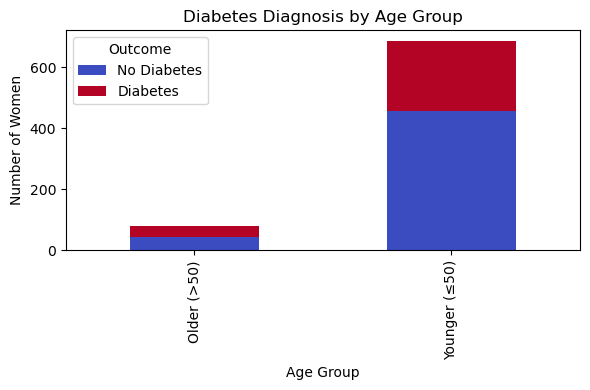

In [88]:
# Create age group categories
df['AgeGroup'] = df['Age'].apply(lambda x: 'Older (>50)' if x > 50 else 'Younger (≤50)')

# Group by age group and outcome
age_outcome_counts = df.groupby(['AgeGroup', 'Outcome']).size().unstack()

# Plot
age_outcome_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6,4))
plt.title('Diabetes Diagnosis by Age Group')
plt.ylabel('Number of Women')
plt.xlabel('Age Group')
plt.legend(['No Diabetes', 'Diabetes'], title='Outcome')
plt.tight_layout()
# Save the plot to your preferred location
save_path = r"D:/DU-Sem1/Period 2/Businnes Intelligence/Project/BI_Project/Visual15_Diabetes Diagnosis by Age Group.png"
plt.savefig(save_path)
plt.show()
